In [1]:
import os
import glob 
import numpy as np
import pandas as pd 
import scanpy as sc
import seaborn as sns

## Load data (Chen et al)

In [2]:
# adata_epi = sc.read_h5ad('/node200data/18parkky/datasets/data/public/processed_data/CRC_MSI_intensity_analysis/h5ad/adata.merged_raw.epi.h5ad')
adata_epi = sc.read_h5ad('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/Combined.scrublet.CellTypeLabeled.Epi.h5ad')

/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [3]:
adata_epi = adata_epi[adata_epi.obs['TreatmentStage']=='Pre'].copy()

/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [6]:
adata_epi = adata_epi[adata_epi.obs['Response']!='SD'].copy()

/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [7]:
dict_patient_to_dataset = {
    'CRC2783' : 'CRC-SG1',
    'CRC2817': 'CRC-SG1',
    'P04': 'Chen et al',
    'P08': 'Chen et al',
    'P11': 'Chen et al',
    'P12': 'Chen et al',
    'P15': 'Chen et al',
    'P16': 'Chen et al',
    'P17': 'Chen et al',
    'P18': 'Chen et al',
    'P19': 'Chen et al',
    'P20': 'Chen et al',
    'P21': 'Chen et al',
    'P22': 'Chen et al',
    'P23': 'Chen et al',
    'P24': 'Chen et al',
    'P25': 'Chen et al',
    'P26' : 'Chen et al',
    'SC035' : 'KUL5',
    'SC044' : 'KUL5',
}

adata_epi.obs['Dataset'] = [  dict_patient_to_dataset[pid] for pid in adata_epi.obs['PatientID'] ]

## Standard Scanpy preprocessing

In [30]:
# # mitochondrial genes, "MT-" for human, "Mt-" for mouse
# adata_epi.var["mt"] = adata_epi.var_names.str.startswith("MT-")
# # ribosomal genes
# adata_epi.var["ribo"] = adata_epi.var_names.str.startswith(("RPS", "RPL"))
# # hemoglobin genes
# adata_epi.var["hb"] = adata_epi.var_names.str.contains("^HB[^(P)]")

# sc.pp.calculate_qc_metrics(
#     adata_epi, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True
# )

In [8]:
feature_selection_method = 'Scanpy'

In [9]:
sc.pp.normalize_total(adata_epi, target_sum=1e4)
sc.pp.log1p(adata_epi)

if feature_selection_method == 'Scanpy':
    sc.pp.highly_variable_genes(adata_epi, min_mean=0.0125, max_mean=3, min_disp=0.5)
    adata_epi.raw = adata_epi.copy()
    adata_epi = adata_epi[:, adata_epi.var.highly_variable]

/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


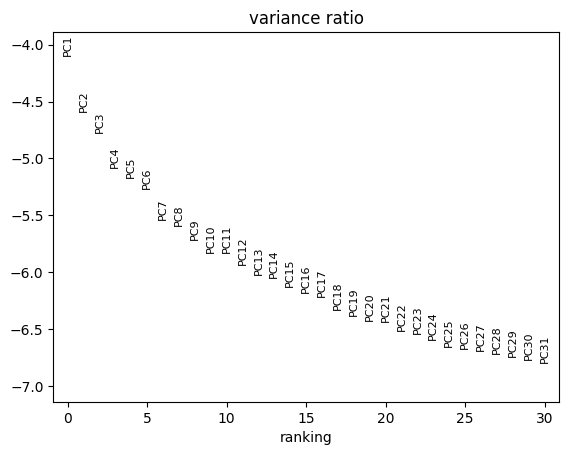

In [10]:
sc.pp.scale(adata_epi, max_value=10)
sc.tl.pca(adata_epi, svd_solver="arpack")
sc.pl.pca_variance_ratio(adata_epi, log=True)

In [11]:
sc.pp.neighbors(adata_epi, n_neighbors=15, n_pcs=40)

2024-12-03 22:53:20.579413: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-03 22:53:20.612632: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-03 22:53:21.119236: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-03 22:53:21.275024: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-03 22:53:21.471159: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [12]:
sc.tl.umap(adata_epi, )

In [13]:
sc.tl.leiden(adata_epi, resolution=0.2,)

/tmp/ipykernel_240806/2675329595.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_epi, resolution=0.2,)


In [14]:
smillie_marker = pd.read_csv('/node200data/18parkky/datasets/reference/marker_genes/colon/Smillie_et_al/colon_epithelial_marker.csv', )
set(smillie_marker['ident'])

{'Best4+ Enterocytes',
 'Cycling TA',
 'E.Absorptive',
 'E.Absorptive_All',
 'E.Epithelial',
 'E.Immature_Enterocytes',
 'E.Secretory',
 'E.Secretory_All',
 'Enterocyte Progenitors',
 'Enterocytes',
 'Enteroendocrine',
 'Goblet',
 'Immature Enterocytes 1',
 'Immature Enterocytes 2',
 'Immature Goblet',
 'M cells',
 'Secretory TA',
 'Stem',
 'TA 1',
 'TA 2',
 'Tuft'}

In [15]:
# sc.tl.score_genes(adata_epi, list(smillie_marker[smillie_marker['ident']=='TA 1']['gene']), score_name='TA 1')
# sc.tl.score_genes(adata_epi, list(smillie_marker[smillie_marker['ident']=='TA 2']['gene']), score_name='TA 2')
# sc.tl.score_genes(adata_epi, list(smillie_marker[smillie_marker['ident']=='Tuft']['gene']), score_name='Tuft')
# sc.tl.score_genes(adata_epi, list(smillie_marker[smillie_marker['ident']=='Enteroendocrine']['gene']), score_name='Enteroendocrine')
sc.tl.score_genes(adata_epi, list(smillie_marker[smillie_marker['ident']=='Enterocytes']['gene']), score_name='Enterocytes')
sc.tl.score_genes(adata_epi, list(smillie_marker[smillie_marker['ident']=='Stem']['gene']), score_name='Stem')
sc.tl.score_genes(adata_epi, list(smillie_marker[smillie_marker['ident']=='Goblet']['gene']), score_name='Goblet')

       'RP11-125B21.2', 'C12orf36', 'RP11-426L16.3', 'SEPP1', 'LINC00704',
       'MIR4435-1HG', 'CTC-490G23.2', 'LINC00035', 'GPR110', 'C1orf106',
       'RP11-202A13.1', 'CTB-171A8.1', 'RP11-35P15.1', 'RP11-30P6.6',
       'RP11-542M13.2'],
      dtype='object')


       'RP11-290L1.2', 'GYLTL1B', 'AP000344.3', 'RP11-760H22.2', 'ATP5G1',
       'RP11-435O5.2', 'RP11-519G16.5', 'FAM84A', 'ADCK3', 'NGFRAP1',
       'RPSAP58'],
      dtype='object')
       'CTD-2589M5.4', 'RP3-340N1.5', 'FAM101A', 'MT-RNR2', 'MFSD4',
       'RP11-665N17.4', 'RP11-48O20.4', 'RP11-845C23.2', 'RP11-757F18.5',
       'RP11-92K15.3', 'GAREM'],
      dtype='object')


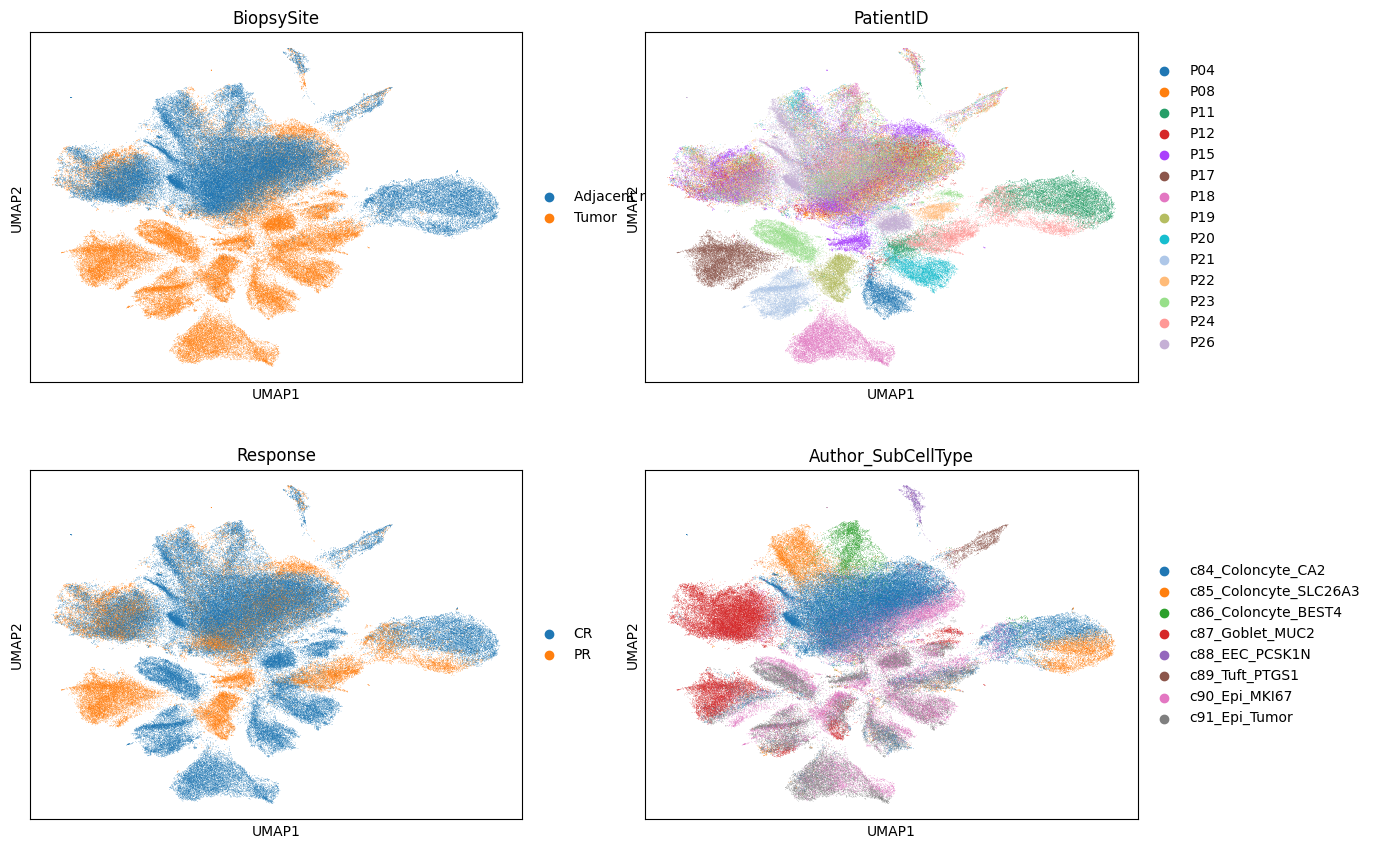

In [16]:
sc.pl.umap(adata_epi, color=['BiopsySite', 'PatientID', 
                             'Response', 'Author_SubCellType'], ncols=2)

In [17]:
adata_epi.write('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/Combined.scrublet.CellTypeLabeled.Epi.Pre.BasicProcessing.h5ad')